In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # [作業目標]
 - 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果
 - 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
 - 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?
 # [作業重點]
 - 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
plt.style.use('ggplot')

# 設定 data_path
dir_data = './data/'


In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape


(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
# app_train.head()


(307511, 122)


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])


 ### 相關係數
 一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

 ## 練習時間
 列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

 通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，
 並嘗試找出有趣的訊息
 - 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和
 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，
 那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
# 列出 TARGET 與其他欄位的相關係數
target_corr = app_train.corr()['TARGET']
sorted_list = target_corr.sort_values()
print("最小的15項")
print(sorted_list[0:15])
print("最大的15項")
print(sorted_list[-17:-2])


最小的15項
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64
最大的15項
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHO

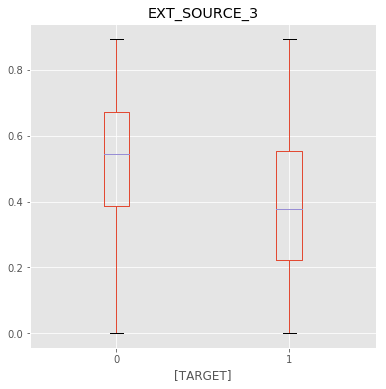

In [7]:
plt_column = ['EXT_SOURCE_3']
plt_by = ['TARGET']

app_train.boxplot(column=plt_column, by = plt_by, 
        showfliers = False, figsize=(6,6))
plt.suptitle('')
plt.show()
